In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("house_price.csv")

In [3]:
df.head(2)

,build_year,neighbour_hood,price,total_price,area,floor,rooms,Parking,Elevator,Warehouse,Luxury_features
0,1401,امیرآباد,91900000,12500000000,136,4.0,3,1,1,1,0
1,1383,دولت,69400000,7500000000,108,2.0,2,1,0,1,0


In [4]:
y = df["price"]
X = df.drop(["price" , "total_price"] , axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [5]:
train = pd.concat([X_train , y_train] ,axis=1)

In [6]:
train.head(1)

,build_year,neighbour_hood,area,floor,rooms,Parking,Elevator,Warehouse,Luxury_features,price
17989,1390,سعادتآباد,80,4.0,2,1,1,1,0,9400000


In [7]:
train.describe()

,build_year,area,floor,rooms,Parking,Elevator,Warehouse,Luxury_features,price
count,23411.000000,23411.000000,23411.000000,23411.000000,23411.000000,23411.000000,23411.000000,23411.00000,2.341100e+04
mean,1393.169536,139.144206,4.398061,2.386912,0.666823,0.633249,0.599291,0.20563,8.919591e+07
std,7.458334,160.728276,5.277589,0.795474,0.471359,0.481928,0.490053,0.40417,7.619688e+08
min,1360.000000,3.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,7.890000e+05
25%,1386.000000,85.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,5.438810e+07
50%,1395.000000,115.000000,3.000000,2.000000,1.000000,1.000000,1.000000,0.00000,7.250000e+07
75%,1400.000000,157.000000,5.000000,3.000000,1.000000,1.000000,1.000000,0.00000,1.000000e+08
max,1401.000000,15555.000000,146.000000,10.000000,1.000000,1.000000,1.000000,1.00000,1.162577e+11


In [8]:
np.percentile(train["area"] ,75)

157.0

In [9]:
np.percentile(train["area"] ,75)

157.0

In [10]:
train = train[train["area"] < 1.5*np.percentile(train["area"] ,75)]
train = train[train["area"] >= 30]

In [11]:
train["area"].sort_values()

15632     30
12331     31
17139     33
15591     33
29200     33
        ... 
2697     235
3713     235
1019     235
22248    235
22758    235
Name: area, Length: 21112, dtype: int64

In [12]:
train = train[train["price"] < np.percentile(train["price"] , 99)]

In [13]:
import seaborn as sns

c:\Users\aminr\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='area'>

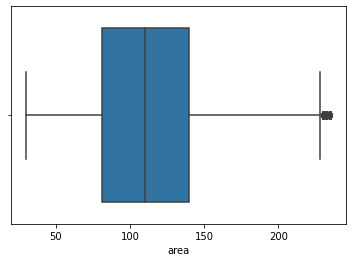

In [14]:
sns.boxplot(train["area"])

<AxesSubplot:xlabel='area', ylabel='Count'>

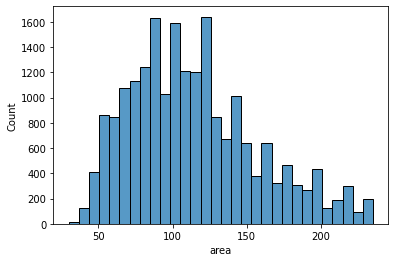

In [15]:
sns.histplot(train["area"] , bins= 30)

<AxesSubplot:xlabel='area', ylabel='Count'>

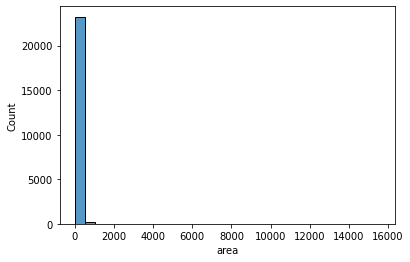

In [16]:
sns.histplot(X_train["area"] , bins= 30)

<AxesSubplot:xlabel='Luxury_features', ylabel='price'>

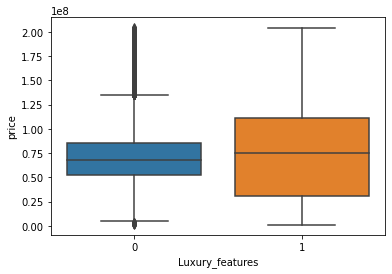

In [17]:
sns.boxplot(x = train["Luxury_features"] , y = train["price"])

<AxesSubplot:xlabel='Parking', ylabel='price'>

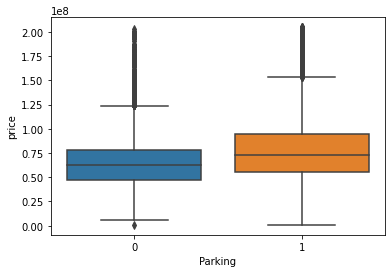

In [18]:
sns.boxplot(x = train["Parking"] , y = train["price"])

<AxesSubplot:xlabel='Warehouse', ylabel='price'>

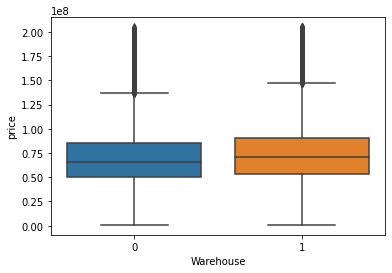

In [19]:
sns.boxplot(x = train["Warehouse"] , y = train["price"])

<AxesSubplot:xlabel='floor', ylabel='price'>

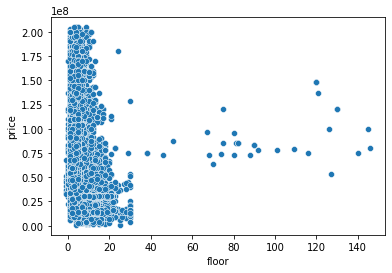

In [20]:
sns.scatterplot(data= train , x ="floor" , y = "price")

In [21]:
nhs = train.groupby("neighbour_hood").mean().sort_values(by = "price" ,ascending = False).index

In [22]:
list(enumerate(nhs))

[(0, 'باغفردوس'),
 (1, 'پلرومی'),
 (2, 'لواسانیفرمانیه'),
 (3, 'صرافهاسعادتآباد'),
 (4, 'زعفرانیه'),
 (5, 'ولنجک'),
 (6, 'محمودیه'),
 (7, 'بلوارفرهنگسعادتآباد'),
 (8, 'رستمآباد'),
 (9, 'اندرزگوفرمانیه'),
 (10, 'فرمانیه'),
 (11, 'فرشته'),
 (12, 'بلوارشهرداریسعادتآباد'),
 (13, 'الهیه'),
 (14, 'نیاوران'),
 (15, 'آجودانیه'),
 (16, 'صاحبقرانیه'),
 (17, 'کامرانیه'),
 (18, 'جمشیدیهنیاوران'),
 (19, 'یاسرنیاوران'),
 (20, 'شهرک'),
 (21, 'سازمانآبصادقیه'),
 (22, 'حکمت'),
 (23, 'امامزادهقاسم'),
 (24, 'دروس'),
 (25, 'کاشانک'),
 (26, 'جماران'),
 (27, 'اویندرکه'),
 (28, 'اقدسیه'),
 (29, 'درکه'),
 (30, 'قیطریه'),
 (31, 'دزاشیب'),
 (32, 'شهرکژاندارمریمرزداران'),
 (33, 'قبا'),
 (34, 'جردن'),
 (35, 'بلواردریاسعادتآباد'),
 (36, 'دربدوم'),
 (37, 'گیشا'),
 (38, 'میرداماد'),
 (39, 'اراج'),
 (40, 'کوهستانسعادتآباد'),
 (41, 'آرارات'),
 (42, 'درختیشهرکغرب'),
 (43, 'تجریش'),
 (44, 'دربند'),
 (45, 'شهرکوالفجر'),
 (46, 'ایوانکشهرکغرب'),
 (47, 'ونک'),
 (48, 'پاسداران'),
 (49, 'دولت(کلاهدوز)'),
 (50, 'اختیاریه'),
 (

In [23]:
temp = train.groupby("neighbour_hood").mean().sort_values(by = "price" ,ascending = False)

In [24]:
freq = train.groupby("neighbour_hood").size().sort_values(ascending = False)

<AxesSubplot:xlabel='price', ylabel='Count'>

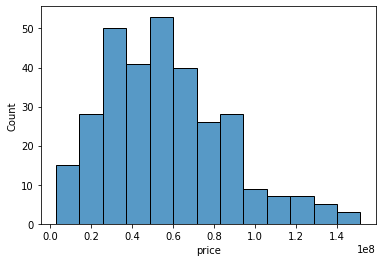

In [25]:
sns.histplot(temp["price"])

In [26]:
import matplotlib.pyplot as plt

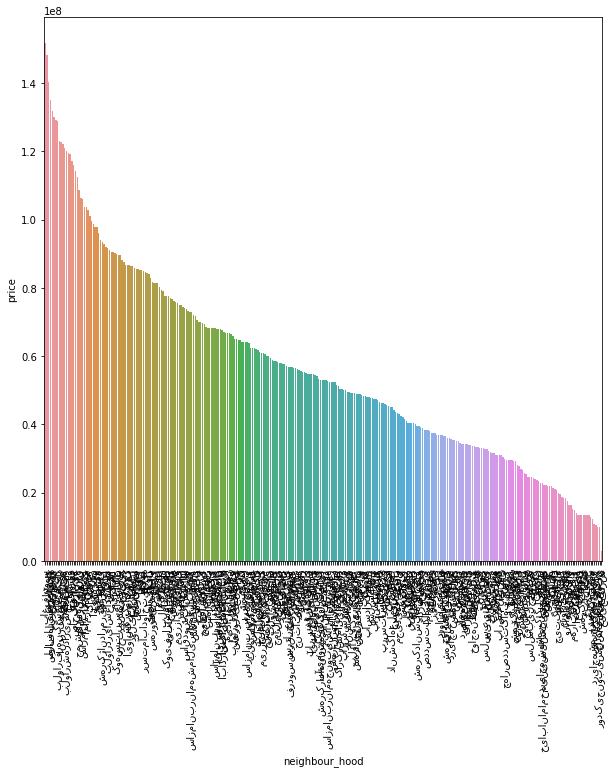

In [36]:
fig , ax = plt.subplots(1,1,figsize = (10,10))
ax = sns.barplot(x= temp.index , y = temp["price"])
ax.set_xticklabels(ax.get_xticklabels() ,rotation = 90 );

In [27]:
ranges = temp.describe(percentiles=np.arange(0.1,1,0.0499999))["price"].iloc[3:].to_list()
ranges

[2933375.0,
 22175000.0,
 28110437.201913044,
 31890513.54961829,
 34386716.93223376,
 37451108.13801447,
 40870388.2665,
 46898398.271602206,
 49194264.312558055,
 52950785.04662857,
 52950809.52380952,
 56528994.36012093,
 60089222.59317828,
 64591105.614287935,
 68193041.5053,
 74061608.6774738,
 81342999.12723273,
 86623127.31425188,
 94030257.30838335,
 116481398.72462617,
 151598048.697143,
 151600000.0]

In [28]:
ranges[-1] += 1 # to include max value
encoding = {}
for i in range(1,len(ranges)):
    # print(ranges[i] , ranges[i-1])
    l = list(temp[(temp["price"]>= ranges[i-1])  & (temp["price"] <ranges[i])].index)
    for nh in l:
        encoding[nh] = i

In [29]:
encoding

{'مسعودیه': 1,
 'سنگلج': 1,
 'خزانه': 1,
 'شادآباد': 1,
 'چیتگر': 1,
 'دولتاباد': 1,
 'چیتگرشمالی': 1,
 'دولتخواه': 1,
 'اتابک': 1,
 'مرواریدشهر': 1,
 'مولوی': 1,
 'یافتآباد': 1,
 'وردآوردجنوبی': 1,
 'دانشگاه': 1,
 'فردوسی': 1,
 'مهرآبادجنوبی': 1,
 'سرشرقی': 1,
 'احتشامیه': 1,
 'ابوذر': 1,
 'قزوین': 1,
 'شهرکآپادانا': 1,
 'رازی': 1,
 'عبدلآباد': 1,
 'فتح': 1,
 'سرخهحصار': 1,
 'شهرکچشمه': 1,
 'شهرجدیداندیشه': 1,
 'دریاچهشهداخلیجفارس': 1,
 'بهارستان': 1,
 'جادهمخصوصکرج': 1,
 'رودکیجنوبیسلسبیلجنوبی': 1,
 'خلیجفارس': 1,
 'وردآوردشمالی': 2,
 'شهرکراهآهن': 2,
 'شمیراننو': 2,
 'جوانمردقصاب': 2,
 'فلاح': 2,
 'وردآورد': 2,
 'سلسبیلجنوبی': 2,
 'شوش': 2,
 'جوادیه': 2,
 'طیب': 2,
 'زنجان': 2,
 'شهرکگلستان': 2,
 'دریاچهشهدایخلیجفارس': 2,
 'خیابانامامخمینیسلسبیلجنوبی': 2,
 'نعمتآباد': 2,
 'خاکسفید': 3,
 'بلورسازی': 3,
 'مشیریه': 3,
 'تولیددارو': 3,
 'جی': 3,
 'پارسمنطقه8': 3,
 'آبشار': 3,
 'نواب': 3,
 'چهارصددستگاهپیروزی': 3,
 'گمرک': 3,
 'خراسان': 3,
 'افسریه': 3,
 'آزادشهر': 3,
 'شهرکولیعصر': 3,
 

In [42]:
# train.groupby("neighbour_hood").median()

info_df = train.groupby("neighbour_hood").agg([ np.mean, np.std, np.median,
                      np.min, np.max])["price"]

info_df

,mean,std,median,amin,amax
neighbour_hood,,,,,
آبشار,3.093772e+07,1.255048e+07,30000000.0,7166666,59239130
آتیسازسعادتآباد,6.800000e+07,0.000000e+00,68000000.0,68000000,68000000
آجودانیه,1.172810e+08,3.061676e+07,107894736.0,60700000,194915000
آذربایجان,3.934706e+07,8.680917e+06,38000000.0,24528301,55875000
آذری,2.822350e+07,1.023184e+06,28223500.0,27500000,28947000
...,...,...,...,...,...
گمرک,2.971014e+07,NaN,29710144.0,29710144,29710144
گیشا,9.052190e+07,1.806051e+07,89285714.0,51020408,147727272
یاسرنیاوران,1.086333e+08,1.495337e+07,100000000.0,100000000,125900000


In [44]:
train = pd.merge(train , info_df , how= "left" , left_on="neighbour_hood" , right_index= True)

In [45]:
train = train[~train["neighbour_hood"].isna()].copy()

In [46]:
train["neighbour_hood_encoded"] = train["neighbour_hood"].apply(lambda x : encoding[x] )

In [49]:
train

,build_year,neighbour_hood,area,floor,rooms,Parking,Elevator,Warehouse,Luxury_features,price,mean,std,median,amin,amax,neighbour_hood_encoded
17989,1390,سعادتآباد,80,4.0,2,1,1,1,0,9400000,8.282523e+07,2.978417e+07,77419000.0,8700000.0,204500000.0,17
23217,1401,یوسفآباد,124,3.0,2,1,1,1,0,122984000,8.417688e+07,1.699174e+07,82853703.5,48969072.0,153846000.0,17
11888,1398,دریاچهخلیجفارس,108,10.0,2,0,0,0,0,45370370,3.582914e+07,1.620080e+07,38532110.0,12500000.0,72784810.0,5
23136,1394,جردن,145,3.0,3,1,1,1,1,110345000,9.182152e+07,1.964683e+07,89721875.0,48000000.0,140000000.0,18
25292,1380,سعادتآباد,80,2.0,2,1,1,1,0,90000000,8.282523e+07,2.978417e+07,77419000.0,8700000.0,204500000.0,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21575,1393,نیاوران,98,4.0,2,1,1,1,0,82700000,1.193011e+08,3.415565e+07,120000000.0,21348314.0,200000000.0,20
5390,1401,فرمانیه,145,7.0,3,1,1,1,0,170000000,1.221767e+08,3.065950e+07,120700000.0,16200000.0,190000000.0,20
860,1399,زعفرانیه,190,5.0,3,1,1,0,1,155000000,1.318650e+08,3.497272e+07,130000000.0,31000000.0,202900000.0,20
15795,1392,هروی,104,3.0,3,1,1,1,0,67300000,7.334599e+07,1.163763e+07,72000000.0,10300000.0,110000000.0,15


In [50]:
test = pd.concat([X_test , y_test] ,axis= 1 )

In [52]:
test = pd.merge(test , info_df , how= "left" , left_on="neighbour_hood" , right_index= True)

In [53]:
test["neighbour_hood_encoded"] = test["neighbour_hood"].apply(lambda x : encoding.get(x,-1))

In [54]:
test.to_csv("test_v2.csv" , index= False)
train.to_csv("train_v2.csv" , index= False)

<AxesSubplot:xlabel='neighbour_hood_encoded', ylabel='price'>

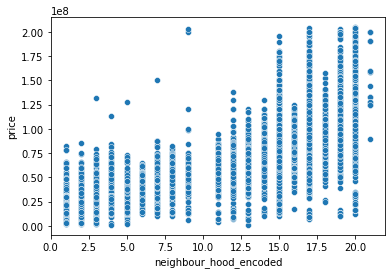

In [56]:
sns.scatterplot(x = train["neighbour_hood_encoded"] , y = train["price"])

In [224]:
train[(train["price"] < 5e7) & (train["neighbour_hood"] == 10)]

,build_year,neighbour_hood,area,floor,rooms,Parking,Elevator,Warehouse,Luxury_features,price
11010,1393,10,64,2.0,2,0,0,0,0,28906250
13048,1380,10,70,2.0,1,0,0,0,0,46428571
28204,1401,10,150,30.0,3,1,1,1,1,12500000
8919,1401,10,75,6.0,2,0,0,0,0,24666666
9651,1383,10,80,1.0,1,0,0,0,0,31250000
8899,1400,10,105,3.0,2,0,0,0,0,16666666
5751,1400,10,85,5.0,2,0,0,0,0,47058823
10802,1380,10,140,1.0,2,0,0,0,0,39285714
4237,1400,10,130,2.0,2,1,1,1,0,16200000
6299,1399,10,108,2.0,2,0,0,0,0,35185185


In [226]:
df.loc[8919]

build_year               1401
neighbour_hood        نیاوران
price                24666666
total_price        1850000000
area                       75
floor                     6.0
rooms                       2
Parking                     0
Elevator                    0
Warehouse                   0
Luxury_features             0
Name: 8919, dtype: object